MADE BY MANAV MANGUKIYA

In [3]:
import os
import numpy as np
import shutil
import pandas as pd


def train_test_split():
    print("########### Train Test Val Script started ###########")

    root_dir='CNN-Dataset'

    classes_dir=['COVID', 'Normal', 'Viral Pneumonia']

    processed_dir='CNN-Dataset'

    val_ratio=0.20
    test_ratio=0.20

    for cls in classes_dir:

        print("$$$$$$$ Class Name " + cls + " $$$$$$$")
        src = processed_dir +"/" + cls  

        allFileNames=os.listdir(src)
        np.random.shuffle(allFileNames)
        train_FileNames, val_FileNames, test_FileNames=np.split(np.array(allFileNames),
                                                                  [int(len(allFileNames) * (1 - (val_ratio + test_ratio))),
                                                                   int(len(allFileNames) * (1 - val_ratio)),
                                                                   ])

        train_FileNames=[src + '/' + name for name in train_FileNames.tolist()]
        val_FileNames=[src + '/' + name for name in val_FileNames.tolist()]
        test_FileNames=[src + '/' + name for name in test_FileNames.tolist()]

        print('Total images: '+ str(len(allFileNames)))
        print('Training: '+ str(len(train_FileNames)))
        print('Validation: '+  str(len(val_FileNames)))
        print('Testing: '+ str(len(test_FileNames)))

        os.makedirs(root_dir + '/train/' + cls)
        os.makedirs(root_dir + '/val/' + cls)
        os.makedirs(root_dir + '/test/' + cls)

        
        for name in train_FileNames:
            shutil.copy(name, root_dir + '/train/' + cls)

        for name in val_FileNames:
            shutil.copy(name, root_dir + '/val/' + cls)

        for name in test_FileNames:
            shutil.copy(name, root_dir + '/test/' + cls)

    print("########### Train Test Val Script Ended ###########")

train_test_split()

########### Train Test Val Script started ###########
$$$$$$$ Class Name COVID $$$$$$$
Total images: 3616
Training: 2169
Validation: 723
Testing: 724
$$$$$$$ Class Name Normal $$$$$$$
Total images: 4990
Training: 2994
Validation: 998
Testing: 998
$$$$$$$ Class Name Viral Pneumonia $$$$$$$
Total images: 1345
Training: 807
Validation: 269
Testing: 269
########### Train Test Val Script Ended ###########


**TRAINING/TESTING MODEL**

In [4]:
# libraries required to train the model
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
#path to get images
train_path='CNN-Dataset/train/'
val_path='CNN-Dataset/val/'
test_path='CNN-Dataset/test/'

In [6]:
img_size=[224, 224]

batch_size=32  
no_epochs=5
lr=0.0001
no_classes=3

In [7]:
import os

classes=os.listdir(train_path)
no_classes=len(classes)

In [8]:
print("Class --> {} \n and the length is : {}".format(classes, no_classes))

Class --> ['COVID', 'Normal', 'Viral Pneumonia'] 
 and the length is : 3


In [9]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [10]:
training_set=train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 5970 images belonging to 3 classes.


In [11]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [12]:
test_set=test_datagen.flow_from_directory(
    directory=test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1991 images belonging to 3 classes.


In [13]:
#import the VGG 16 library as shown below and add preprocessing layer to the front of VGG

vgg = VGG16(input_shape=img_size+[3], weights='imagenet', include_top=False)

In [14]:
for layer in vgg.layers:
    layer.trainable=False

In [15]:
x=Flatten()(vgg.output)

prediction=Dense(no_classes, activation='softmax')(x)

In [16]:
model=Model(inputs=vgg.input, outputs=prediction)

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [18]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [19]:
#fit the model
history=model.fit(
    training_set, 
    validation_data=test_set, 
    epochs=5, 
    steps_per_epoch=len(training_set), 
    validation_steps=len(test_set)
    )

Epoch 1/5
187/187 [==============================] - 1203s 6s/step - loss: 0.4615 - accuracy: 0.8174 - val_loss: 0.2968 - val_accuracy: 0.8830
Epoch 2/5
187/187 [==============================] - 16614s 89s/step - loss: 0.2676 - accuracy: 0.8966 - val_loss: 0.2298 - val_accuracy: 0.9036
Epoch 3/5
187/187 [==============================] - 1429s 8s/step - loss: 0.2244 - accuracy: 0.9139 - val_loss: 0.2566 - val_accuracy: 0.8960
Epoch 4/5
187/187 [==============================] - 1428s 8s/step - loss: 0.2166 - accuracy: 0.9141 - val_loss: 0.2017 - val_accuracy: 0.9262
Epoch 5/5
187/187 [==============================] - 1428s 8s/step - loss: 0.2028 - accuracy: 0.9233 - val_loss: 0.1916 - val_accuracy: 0.9277


In [20]:
validation_datagen=ImageDataGenerator(rescale=1./255)

validation_set=validation_datagen.flow_from_directory(
    directory=val_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1990 images belonging to 3 classes.


In [21]:
validation_steps=20

loss,accuracy=model.evaluate(validation_set, steps=validation_steps)

print("loss: {:.2f}".format(loss))
print("accuracy: {:.2f}".format(accuracy))

20/20 [==============================] - 111s 6s/step - loss: 0.1667 - accuracy: 0.9359
loss: 0.17
accuracy: 0.94


In [22]:
model.save('CPN_Model_VGG16.h5')

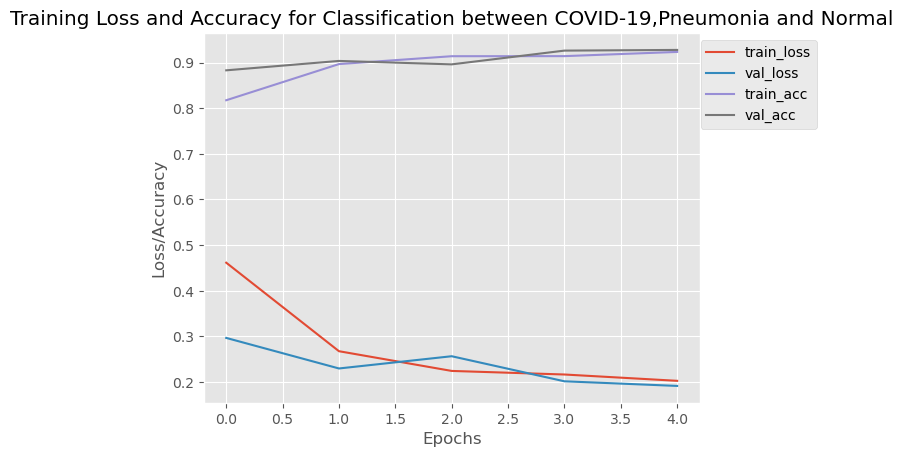

In [23]:
#loss/accuracy graph
n=no_epochs
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, n), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, n), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, n), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, n), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy for Classification between COVID-19,Pneumonia and Normal")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
plt.savefig("plot1.png")

In [24]:
#to check test accuacy
modelLoss, modelAccuracy=model.evaluate(test_set, verbose=0)

print('Test Loss is: {}'.format(modelLoss))
print('Test Accuracy is: {}'.format(modelAccuracy ))

Test Loss is: 0.19159789383411407
Test Accuracy is: 0.9276745319366455


**PREDICTING THE OUTPUT**

In [25]:
#loading the model
from tensorflow import keras
model=keras.models.load_model('CPN_Model_VGG16.h5')

In [27]:
from keras.utils import load_img, img_to_array

In [31]:
#get sample image to test
img_normal=load_img('CNN-Dataset/Normal/Normal-500.png', target_size=(224, 224))
img_pneumonia=load_img('CNN-Dataset/Viral Pneumonia/Viral Pneumonia-1000.png', target_size=(224, 224))
img_covid=load_img('CNN-Dataset/COVID/COVID-19.png', target_size=(224, 224))

In [34]:
def model_predict(img, actual):
    x=img_to_array(img)
    x=np.expand_dims(x, axis=0)
    x_processed=preprocess_input(x)
    result=model.predict(x_processed)
    index = np.argmax(result,axis=1)
    if index==0:
       result="covid-19"
    elif index==1:
       result="normal"
    else:
       result="pneumonia"

    plt.figure()
    plt.imshow(img)
    plt.title('Actual : {} --> Predicted  : {}'.format(actual, result))

1/1 [==============================] - 0s 124ms/step


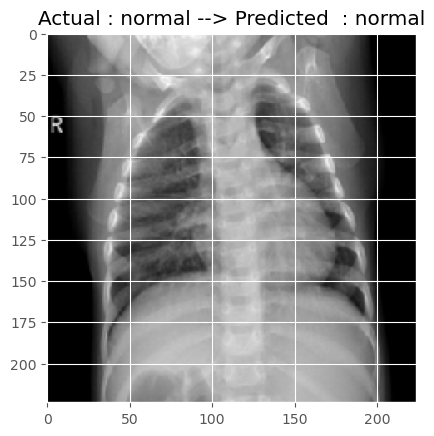

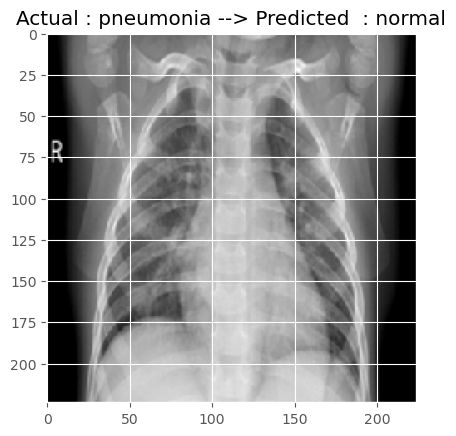

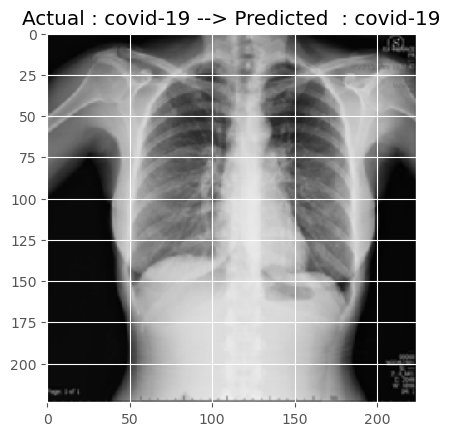

In [35]:
pred_normal=model_predict(img_normal, "normal")
pred_pneumonia=model_predict(img_pneumonia, "pneumonia")
pred_covid=model_predict(img_covid, "covid-19")